### Student Information
Name: 郭玫均

Student ID: 108048110

GitHub ID: MeganKuo0704

Kaggle name: Group21

Kaggle private scoreboard snapshot: <td><img src="pics/82.png" style="width: 300px;"/> </td>

[Snapshot](pics/82.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 15th 11:59 pm, Tuesday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 18th 11:59 pm, Friday)__. 

## **Prerequisite**

In [47]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import os
import re
from itertools import chain


import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Attention, Embedding

## **Take Home Exercise**

---
### **Exercise 1 (Take home):**  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
### training data
anger_train = pd.read_csv("C:\Users\megan\Desktop\DSPMT\DS\Data Mining\Lab2\DM2022-Lab2-Master\data\semeval\train\anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("C:\Users\megan\Desktop\DSPMT\DS\Data Mining\Lab2\DM2022-Lab2-Master\data\semeval\train\sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("C:\Users\megan\Desktop\DSPMT\DS\Data Mining\Lab2\DM2022-Lab2-Master\data\semeval\train\fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("C:\Users\megan\Desktop\DSPMT\DS\Data Mining\Lab2\DM2022-Lab2-Master\data\semeval\train\joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset => prevent bias
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

In [ ]:
# Answer here
def exec1(DF):
    count_vect = CountVectorizer()
    word_counts = count_vect.fit_transform(DF.text)   # learn the vocab and retuen document term matrix

    print(f'data samples counts: {DF.shape[0]}\nhow many terms: {word_counts.shape[1]}')

    term_frequencies = []
    for j in range(0,word_counts.shape[1]):
        term_frequencies.append(sum(word_counts[:,j].toarray())) # how many times a term is presented in these documents.

    DF_asc = pd.DataFrame({'words': count_vect.get_feature_names_out()[:] ,'term freq': term_frequencies[:]}).sort_values(by='term freq', ascending=False)
    return DF_asc

train_wf = exec1(train_df)
train_wf['term freq'] = train_wf['term freq'].apply(pd.Series).to_numpy().flatten()

/tmp/ipykernel_27836/639505538.py:1: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



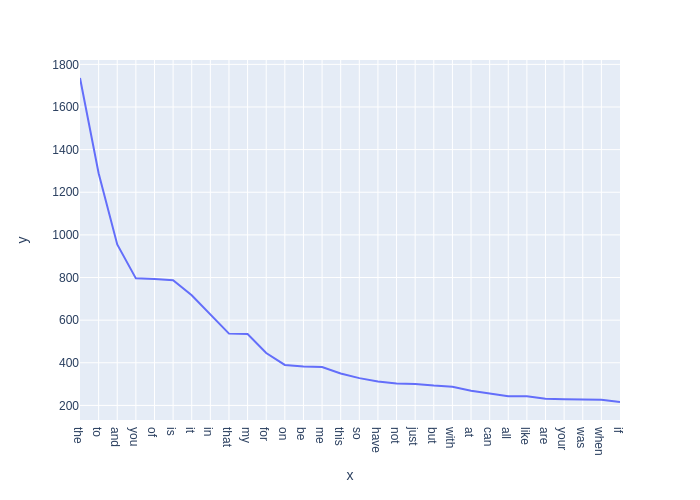

In [ ]:
fig = px.line(x=train_wf.words[:30], y=train_wf['term freq'][:30]);
fig.show("png");

---
### **Exercise 2 (Take home):**  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
Tfidf_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

Tfidf_df = Tfidf_vect.fit_transform(train_df['text'], )

feature_names = Tfidf_vect.get_feature_names_out()
feature_names[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### **Exercise 3 (Take home):**  
Can you interpret the results above? What do they mean?

> So the predicted label is the prediction provided by the model, while the true label represent the ground truth of the given variable. The diagonal of the matrix is **True Positive**, which the predicted label maps the ground truth; while the upper right and the lower left triangular areas of the matrix indicate error predictions, for example, for the value of 9 presenting on the left right corner of the matrix implies the model predicts 9 texts as sadness while the actual emotions of certain texts are anger.

---
### **Exercise 4 (Take home):**  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()

## training!
GNB_model.fit(X_train.toarray(), y_train)

## predict!
y_train_pred = GNB_model.predict(X_train.toarray())
y_test_pred = GNB_model.predict(X_test.toarray())

## so we get the pred result
y_test_pred[:10]

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.76
testing accuracy: 0.65


---
### **Exercise 5 (Take home):**  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Answer here**


> While one can simply pass a sparse matrix into decision tree model, Caussian model requires user to decompose the matrix. As we can compare the accuracy score from tha above implementation that decision tree classifier is obviously doing a better job than Gaussian model.

> Naive Bayes classifier is statistical model based on Bayes' thm which is generally used to calculate the probability of certain event (A) conditioned under the other events, say B, and it assumes that we have some prior knowledge of the distribution of B. While it stems from the assumption that all features passed into the model are mutually exclusive, which indicates that every variable should be orthogonal to each other. Its shortcoming is that they tend to drop irrelevant features, so when we tried to predict class C, if an uncommon feature is included, Gaussian model would not performed well.

> On the other hand, decision tree checked each individual feature and follow the branch that corresponds to its value during inference. A major disadvantage of the model may be its tree height. If the model were fed a large dataset, spliting every feature node would cost a lot of computational resources.

> After digging into the related algorithm, I think the reason why Gaussian performs worse compared to discission tree model is that the correlation between variables are not fully eliminated. As we can observe from the above covariance matrix, there are certain terms appear to correlate with other terms, which indicates the mutual exclusive assumption from Gaussian model is violated. I think that might be the reason why the decision tree model has a better prediction accuracy.

---
### **Exercise 6 (Take home):**  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

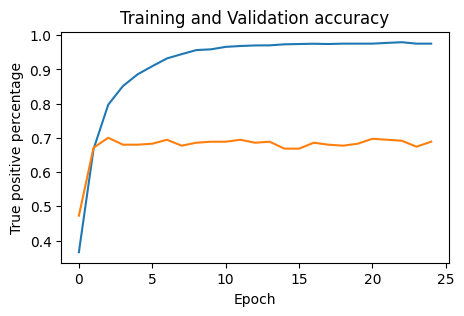

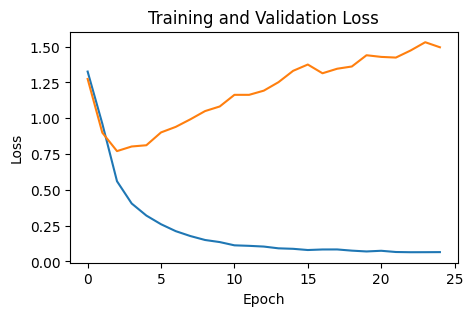

In [ ]:
# Answer here
fig, ax = plt.subplots(figsize=(5,3))
plt.plot(pd.DataFrame({'Training accuracy':training_log.accuracy, 'Val accuracy':training_log.val_accuracy}))

#arrange
plt.ylabel('True positive percentage')
plt.xlabel('Epoch')
plt.title('Training and Validation accuracy')
plt.show()

########################

fig, ax = plt.subplots(figsize=(5,3))
plt.plot(pd.DataFrame({'Training loss':training_log.loss, 'Val loss':training_log.val_loss}))

#arrange
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

---
### **Exercise 7 (Take home):**  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
# how can we use the word factors to train our model?
word2vec_model = Word2Vec.load('word2vec.model')

word_vect = word2vec_model.wv
word2vec_X = train_df.text_tokenized.apply(lambda x: word2vec_model.wv[x])
word2vec_X = word2vec_X.apply(lambda x: np.mean(x.transpose(), axis=1)).apply(pd.Series)

word2vec_X_test = test_df.text_tokenized.apply(lambda x: word2vec_model.wv[x])
word2vec_X_test = word2vec_X_test.apply(lambda x: np.mean(x.transpose(), axis=1)).apply(pd.Series)

In [ ]:
# model

# input layer
model_input = Input(shape=(word2vec_X.shape[1], ))  # 100
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

csv_logger = CSVLogger('logs/training_word2vec_log.csv')

# training setting
epochs = 25 # total num of iterations
batch_size = 32 # pass 32 samples to the network at a time

# training!
history = model.fit(word2vec_X, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (word2vec_X_test, y_test))
print('training finish')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                6464      
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [ ]:
## predict
pred_result = model.predict(word2vec_X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 1s 5ms/step


array([[0.3146005 , 0.2707976 , 0.15718941, 0.25741258],
       [0.20253068, 0.36458677, 0.2200047 , 0.21287784],
       [0.38603237, 0.39846736, 0.08136784, 0.13413246],
       [0.3488763 , 0.25339824, 0.16202915, 0.23569626],
       [0.18183416, 0.33521536, 0.15968224, 0.32326826]], dtype=float32)

In [ ]:
# transform the numerical values into characters
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'fear', 'anger', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.33


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_word2vec_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.314143,1.362201,0.360231,1.360650
1,1,0.341544,1.339580,0.334294,1.362095
2,2,0.341268,1.333990,0.328530,1.363669
3,3,0.349294,1.328833,0.328530,1.370853
4,4,0.345696,1.328329,0.325648,1.366341
5,5,0.357321,1.321936,0.340058,1.373433
6,6,0.363687,1.321431,0.363112,1.366673
7,7,0.350678,1.319567,0.337176,1.367015
8,8,0.362026,1.315391,0.348703,1.370554
9,9,0.361472,1.313196,0.337176,1.371507


## **Kaggle Competition - Emotion Recognition on Twitter**

### **Data Preprocessing**

- Cleaned data read from tweets json file and identify some potential data that might had an effect on model's performance.

In [ ]:
id = pd.read_csv('C:\\Users\\megan\\Desktop\\DSPMT\\DS\\Data Mining\\Lab2\\dataset\\data_identification.csv')
emo = pd.read_csv('C:\\Users\\megan\\Desktop\\DSPMT\DS\\Data Mining\Lab2\dataset\\emotion.csv')
tweets = pd.read_json('C:\\Users\\megan\\Desktop\\DSPMT\\DS\\Data Mining\\Lab2\\dataset\\tweets_DM.json', lines=True)

train_id = id[id.identification=='train']
train_emo = emo[emo.tweet_id.isin(train_id.tweet_id)]
tweets['_index'] = [tweets._source[i]['tweet']['tweet_id'] for i in range(0, tweets.shape[0])]
tweets['hashtags'] = [tweets._source[i]['tweet']['hashtags'] for i in range(0, tweets.shape[0])]
tweets['text'] = [tweets._source[i]['tweet']['text'] for i in range(0, tweets.shape[0])]

# Distinguishing time variable 
tweets['year'] = tweets._crawldate.apply(lambda x: x.split()[0].split('-')[0])
tweets['month'] = tweets._crawldate.apply(lambda x: x.split()[0].split('-')[1])
tweets['day'] = tweets._crawldate.apply(lambda x: x.split()[0].split('-')[2])
tweets['hour'] = tweets._crawldate.apply(lambda x: x.split()[1].split(':')[0])


In [9]:
tweets._crawldate = pd.to_datetime(tweets.iloc[:, 7:])
tweets._crawldate -= min(tweets._crawldate)

tweets.drop(['_source', '_type', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)

In [11]:
tweets.to_pickle('tweets_clean.pkl') # for faster access

In [12]:
tweets = pd.read_pickle('tweets_clean.pkl')
emo = pd.read_csv('C:\\Users\\megan\\Desktop\\DSPMT\DS\\Data Mining\Lab2\dataset\\emotion.csv')
id = pd.read_csv('C:\\Users\\megan\\Desktop\\DSPMT\\DS\\Data Mining\\Lab2\\dataset\\data_identification.csv')

In [25]:
train_id = id[id.identification=='train']   # train dataset generated from id specify in id text file
train_emo = emo[emo.tweet_id.isin(train_id.tweet_id)]

test_id = id[id.identification=='test']
test_df = tweets[tweets['_index'].isin(test_id.tweet_id)]


In [13]:
train_emo.columns = ['_index', 'emo']
train_df = pd.merge(tweets, train_emo, how='inner', on='_index')

test_df = train_df.emo

In [28]:
train_df

,_score,_index,_crawldate,hashtags,text,hour,emo
0,391,0x376b20,142 days 10:00:00,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",11,anticipation
1,433,0x2d5350,392 days 03:00:00,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",04,sadness
2,376,0x1cd5b0,388 days 22:00:00,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,23,fear
3,120,0x1d755c,161 days 03:00:00,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,04,joy
4,1021,0x2c91a8,229 days 01:00:00,[],Still waiting on those supplies Liscus. <LH>,02,anticipation
...,...,...,...,...,...,...,...
1455558,94,0x321566,725 days 01:00:00,"[NoWonder, Happy]",I'm SO HAPPY!!! #NoWonder the name of this sho...,02,joy
1455559,627,0x38959e,90 days 07:00:00,[],In every circumtance I'd like to be thankful t...,08,joy
1455560,274,0x2cbca6,686 days 22:00:00,[blessyou],there's currently two girls walking around the...,23,joy
1455561,840,0x24faed,610 days 13:00:00,[],"Ah, corporate life, where you can date <LH> us...",14,joy


In [36]:
TAG_RE = re.compile(r'<[^>]+>')

def preprocess_text(sen):
    '''
    Args: a string type sentence.
    Return: a cleaned sentence that removed html tags, punctuations, numbers and other irrelevant information from the sentence.
    '''
    # Removing html tags
    sentence = TAG_RE.sub('', sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

def tokenizer(data):
    '''
    Args: a list of string composed of sentences.
    Return: tokenized sentence. (2D array)
    '''
    tokenize_model = CountVectorizer(max_features = 500, tokenizer=nltk.word_tokenize)
    tokenize_model.fit(data['text'])
    token_data = tokenize_model.transform(data['text'])

    return token_data

In [39]:
preprocess_text(train_df.text[0])

'People who post add me on Snapchat must be dehydrated Cuz man that '

In [42]:
train_tokens = train_df.text.apply(lambda x: preprocess_text(x))
test_tokens = test_df.text.apply(lambda x: preprocess_text(x))
# This process takes a while

In [43]:
train_df.text = train_tokens
test_df.text = test_tokens

c:\Users\megan\python\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
# since _crawldate's dtype is [ns] calculated since 1911, it has a very large value.
# scaling _score and _crawldate to values between 0-1 to eliminate the effects on our major training data i.e. text.
scaler = MinMaxScaler()

In [62]:
scaler.fit(train_df._crawldate.to_numpy().reshape(train_df.shape[0], 1))
day_range = scaler.transform(train_df._crawldate.to_numpy().reshape(train_df.shape[0], 1))
train_df._crawldate = day_range

scaler.fit(test_df._crawldate.to_numpy().reshape(test_df.shape[0], 1))
day_range = scaler.transform(test_df._crawldate.to_numpy().reshape(test_df.shape[0], 1))
test_df._crawldate = day_range

In [49]:
scaler.fit(train_df._score.to_numpy().reshape(train_df.shape[0], 1))
score_range = scaler.transform(train_df._score.to_numpy().reshape(train_df.shape[0], 1))
train_df._score = score_range

scaler.fit(test_df._score.to_numpy().reshape(test_df.shape[0], 1))
score_range = scaler.transform(test_df._score.to_numpy().reshape(test_df.shape[0], 1))
test_df._score = score_range

In [50]:
train_df.to_pickle('train_df.pkl')
test_df.to_pickle('test_df.pkl')    # for faster access

### **Begin Training Here**

In [2]:
train_df = pd.read_pickle('train_df.pkl')
test_df = pd.read_pickle('test_df.pkl')

In [ ]:
train_df = train_df.sample(frac=0.5)    # not enough mem => sample the data

In [5]:
train_df.shape

(727782, 7)

In [6]:
X_train, y_train = train_test_split(train_df, test_size = 0.3, random_state=42) # splitting training and evaluation data

In [7]:
X_test = X_train.emo
y_test = y_train.emo

In [8]:
X_train.drop(['emo', '_index', 'hashtags'], inplace=True, axis=1)
y_train.drop(['emo', '_index', 'hashtags'], inplace=True, axis=1)   # dropping irrelevant information from the dataset

c:\Users\megan\python\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
import nltk

# I have chosen bag-of-words to be my vectorizer
BOW_500 = CountVectorizer(max_features=700, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_features = BOW_500.transform(X_train.text)
val_features = BOW_500.transform(y_train.text)

> I have also tried TfidfVectorizer, bert and titan. The former do not perform as well as CountVectorizer, and so, when I tried to utilize BERT and Titan to embed my sentence list, my computer run out of mem, it could not allocate such large file. Therefore, I consulted with TA, and tried training it on Kaggle notebook then. However, Kaggle notebook displayed that everyone could get a 16G mem, I found out instead that the assigned Mem limit is actually 8G, which is still not enough for performing the task. QAQ

In [25]:
train_features = train_features.toarray()
val_features = val_features.toarray()

> Additionally, I tried both training simple text and adding the other variable into the training dataset. I found out that some model performed slightly better on simple embedded text data, and some models had a better performance on text data with date and score information. I assumed that the reason of such difference comes from the different learning process and model's architecture.

In [ ]:
tmp = np.append(X_train._crawldate.to_numpy().reshape(X_train.shape[0], 1), np.array(X_train._score).reshape(X_train.shape[0], 1), axis=1)
train_features = np.append(train_features.toarray(), tmp, axis=1).astype('float32')
tmp = np.append(y_train._crawldate.to_numpy().reshape(y_train.shape[0], 1), np.array(y_train._score).reshape(y_train.shape[0], 1), axis=1)
val_features = np.append(val_features.toarray(), tmp, axis=1).astype('float32')

In [17]:
train_features.shape, X_test.shape, val_features.shape, y_test.shape

((509447, 502), (509447,), (218335, 502), (218335,))

In [26]:
target_features = BOW_500.transform(test_df.text)   # Embed Target test dataset

In [ ]:
tmp = np.append(np.array(test_df._crawldate).reshape(test_df.shape[0], 1), np.array(test_df._score).reshape(test_df.shape[0], 1), axis=1)
target_features = np.append(target_features.toarray(), tmp, axis=1)

In [14]:
# introduce TA's code to encode the emotions
label_encoder = LabelEncoder()
label_encoder.fit(train_df.emo)  # learn categorical labels

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('test_df[0:7]:\n', train_df.emo[0:7])
print('\ntest_df.shape: ', train_df.emo.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

x_test = label_encode(label_encoder, X_test)
val_test = label_encode(label_encoder, y_test)


print('\n\n## After convert')
print('test_df[0:7]:\n', train_df.emo[0:7])
print('\ntest_df.shape: ', train_df.emo.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
test_df[0:7]:
 1230778           trust
4888               fear
176012              joy
1079570    anticipation
875279            trust
1097582             joy
979455     anticipation
Name: emo, dtype: object

test_df.shape:  (727782,)


## After convert
test_df[0:7]:
 1230778           trust
4888               fear
176012              joy
1079570    anticipation
875279            trust
1097582             joy
979455     anticipation
Name: emo, dtype: object

test_df.shape:  (727782,)


In [15]:
# checking shapes
input_shape = train_features.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  8


#### **Packages for constructing models**

In [16]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Bidirectional
from keras.layers import Embedding, GRU, SimpleRNN, LSTM
from keras.layers import ReLU, Softmax
from keras.constraints import maxnorm
import keras.backend as K

#### **Transforming other training data by reshaping it into 3D dimensions.**

In [43]:
# (batch, time step, word_length)
lstm_train_features = train_features.reshape(5, train_features.shape[0], train_features.shape[1])
lstm_val_features = val_features.reshape(5, val_features.shape[0], train_features.shape[1])

In [ ]:
lstm_x_test = x_test.reshape(1, x_test.shape[0], x_test.shape[1])
lstm_val_test = val_test.reshape(1, val_test.shape[0], val_test.shape[1])

In [79]:
train_features.shape

(101889, 1202)

In [45]:
lstm_val_features = val_features.reshape(1, val_features.shape[0], val_features.shape[1])

##### **First I utilize Decision tree model and Gaussian classifier, both of them are not performing well enough comparing to deep learning models. Therefore, this section focused on how I decided to construct model this way and the result, assumptions and inferences I made for such performance.**

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

2022-11-17 20:35:32.782745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 20:35:32.783488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 20:35:32.784100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.2/lib64:/usr/local/cuda/lib64:/usr/local/cuda-10.1/lib64:/usr/local/cuda-11.3/lib64
2022-11-17 20:35:32.784281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such f

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

#### **Introduce Sequence Self Attention machinism trying to get a better performance on Kaggle**
- **Public Scoreboard: 0.387**
- **Inference Latency: 352 min for frac(0.5) training dataset**
- **Parameters: 540,754**

In [17]:
from keras_self_attention import SeqSelfAttention


model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=input_shape,
                                 output_dim=256,
                                 mask_zero=True))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128,
                                                       return_sequences=True)))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(keras.layers.Dense(units=8))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         128000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        394240    
 l)                                                              
                                                                 
 seq_self_attention (SeqSelf  (None, None, 256)        16449     
 Attention)                                                      
                                                                 
 dense (Dense)               (None, None, 8)           2056      
                                                                 
Total params: 540,745
Trainable params: 540,745
Non-trainable params: 0
_________________________________________________________________


I constructed this model becuase when I had applyed another attention layer on my other computer vision segmentation task, attention has a astonishing effect on the model's performance. However, since it was performed on my lab computer, it was fast and efficient. However, I supposed this attention layer may cost too much computing resources, which result in the slow training and inference time. Since it run slowly, and do not have a significant improvement. I abandoned this method.

#### **Trying Another LSTM bidirectional architecture**
- **Public Scoreboard: 0.37175**
- **Training Latency: 295 min for frac(0.5) training dataset**
- **Parameters: 139,912**

Since the first model do not performed well. I looked up professor's slides and done some research on Net, finding out that LSTM model can memorize the previous text and is capable for understand the entire sentence. And I read a paper that suggested stacking LSTM model could significantly boost model to learn from different former text and had a better generalization capability on testing data.

In [24]:
# input layer
# input layer
model = keras.Sequential()

model.add(Embedding(input_dim=input_shape, output_dim = 64, mask_zero=True))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(Dense(8))

model.summary()

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          32128     
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
Total params: 139,912
Trainable params: 139,912
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
__________________________

However, the result does not meet my supposition. While this is also costing me a lot of time to train, I again abadoned the method.

#### **Trying a deeper model architecture architecture**
- **With only text information, Public Scoreboard: 0.40245**
- **With crawldate and score, Public Scoreboard: 0.41337**
- **Training Latency: 368 min for frac(0.5) training dataset**

Deep learning orginiated from a deep model architecture. So I tried to construct my model with more layers. And since the model has a million parameters, I added the additional dropout layer to prevent the model from overfitting the training dataset.

In [53]:
from tensorflow.keras import regularizers
input_dim = train_features.shape[1]  # Number of features

model = Sequential()
model.add(Dense(512, 
                input_dim=input_dim, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(256, 
                activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 512)               358912    
                                                                 
 dropout_61 (Dropout)        (None, 512)               0         
                                                                 
 dense_70 (Dense)            (None, 256)               131328    
                                                                 
 dropout_62 (Dropout)        (None, 256)               0         
                                                                 
 dense_71 (Dense)            (None, 256)               65792     
                                                                 
 dropout_63 (Dropout)        (None, 256)               0         
                                                                 
 dense_72 (Dense)            (None, 256)              

It was the best accuracy I can get. And this is the model that has a better performance with the additional information (date, score).

#### **Trying BERT model**

In [56]:
# A dependency of the preprocessing for BERT inputs
# !pip install -q -U "tensorflow-text==2.8.*"
# !pip install -q tf-models-official==2.7.0

In [57]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [58]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [59]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [60]:
text_test = X_train.iloc[0].text
text_preprocessed = bert_preprocess_model(text_test)
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

In [ ]:
training_features_bert = bert_model(X_train.text)
val_features_bert = bert_model(y_train.text)

In [61]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

I noticed it is really fast for the model to fit a single sentence, but when I tried to use this model fitting the fractioned training data (have tried 0.1, 0.5), the vectorized training, validation and testing data are too large to be allocated by 8GB on my computer memory (and also on Kaggle notebook) QAQ

Hence, I thought, okay, if I was not able to utilize bert model to fit the text data,might I use its classifier model on bag of words vectorizer to acquire a better result.

In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Still, after training for 2 epochs, the process stopped and reported memory allocation error back to me...

### **Predicting on testing dataset**

In [ ]:
# csv_logger = CSVLogger('logs/training_log.csv')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# training setting
epochs = 25 # total num of iterations
batch_size = 30 # pass 32 samples to the network at a time

# training!
history = model.fit(train_features, x_test, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data = (val_features, val_test))
print('training finish')

Epoch 1/25
16982/16982 [==============================] - 549s 32ms/step - loss: 1.7862 - accuracy: 0.3975 - val_loss: 1.6989 - val_accuracy: 0.4305
Epoch 2/25
16982/16982 [==============================] - 510s 30ms/step - loss: 1.7211 - accuracy: 0.4234 - val_loss: 1.6800 - val_accuracy: 0.4359
Epoch 3/25
16982/16982 [==============================] - 514s 30ms/step - loss: 1.7193 - accuracy: 0.4245 - val_loss: 1.6906 - val_accuracy: 0.4332
Epoch 4/25
16982/16982 [==============================] - 535s 32ms/step - loss: 1.7171 - accuracy: 0.4250 - val_loss: 1.7134 - val_accuracy: 0.4288
Epoch 5/25
16982/16982 [==============================] - 541s 32ms/step - loss: 1.7165 - accuracy: 0.4245 - val_loss: 1.6800 - val_accuracy: 0.4361
Epoch 6/25
16982/16982 [==============================] - 527s 31ms/step - loss: 1.7154 - accuracy: 0.4251 - val_loss: 1.6899 - val_accuracy: 0.4361
Epoch 7/25
16982/16982 [==============================] - 525s 31ms/step - loss: 1.7150 - accuracy: 0.4246

In [ ]:
val_test.shape

(218335, 8)

In [ ]:
lstm_target_features = target_features.reshape(1, target_features.shape[0], target_features.shape[1])

In [ ]:
## predict
target_pred = model.predict(target_features, batch_size=32)


In [ ]:
target_pred = label_decode(label_encoder, target_pred)
target_pred[:5]

array(['joy', 'anticipation', 'joy', 'joy', 'anticipation'], dtype=object)

In [ ]:
submission = pd.DataFrame(np.append(test_df['_index'].to_numpy().reshape(test_df.shape[0], 1), target_pred.reshape(test_df.shape[0], 1), axis=1), columns=['id', 'emotion'])
submission.to_csv('submission.csv', index=False)

## **Conclusion**

Training models is expensive in a way that costing a lot of time and computing resources. Also, it is often that your assumptions do not meet your acquired results. It is really frustrated to get a result after waiting for nearly a day long to train the model. However, I find it interesting to explore different ways and the thinking process of how I could combine different element with the knowledge professor had taught in class to solve a real-life problem. I really have learned a lot from this assignment, and since I failed to train the BERT model on my computer, I was wondering that if the TAs have the time, could you demonstrate how to apply BERT model on a large dataset?
Thank you for your work and lessons. I really appreciate it!